| Changes | Time | Difficulty | 
|---------|------|------------|
|Using the base SVC with kernel ='rbf',c=1.0 and gamma = 'scale with training split of 75%. Get an accuracy of 51%|30 mins|3|
|Use standardScaler to normalize the features and get an accuracy of 63%|30 mins|3|
|Try different training split with the best being 68% with 90% training|10 mins|1|
|Try changing c value ranging from 0.1 to 100 and 1.0 have the accuracy | 30 mins | 3|
|Try using different gamma values but the accuracy move slightly lower than 68%| 30 mins| 3|
|Changing the condition for the model to now guess if the wine is good based on score and get an accuracy of 88%|1 hour|6|
|Changing training split to 75% training and get 92% accuracy|10 mins|1|

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report , mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("wine_data.csv") 

In [18]:
X = df.iloc[:, :-1]  # exclude quality
y = (df["quality"] > 6.5).astype(int)

scaler = StandardScaler()
normalized_X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.25, random_state=42)

model = SVC(kernel='rbf',C=10.0,gamma=1.0)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       347
           1       0.78      0.55      0.64        53

    accuracy                           0.92       400
   macro avg       0.86      0.76      0.80       400
weighted avg       0.91      0.92      0.91       400



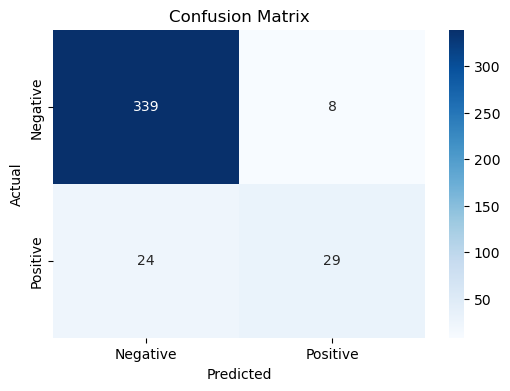

In [20]:
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()